In [23]:
import pandas as pd
import numpy as np
import lightgbm as lgb

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import svm, preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score

In [24]:
df_train_LOX = pd.read_csv('../data/training_set_LOX.csv')
df_train_ANT = pd.read_csv('../data/training_set_antioxidant.csv')
df_test = pd.read_csv('../data/test_set.csv')

#drop title column
df_train_LOX = df_train_LOX.drop(columns = ['Title'], axis = 1)
df_train_ANT = df_train_ANT.drop(columns = ['Title'], axis = 1)
df_test = df_test.drop(columns = ['Title'], axis = 1)



In [25]:
#replace NaN values in each file with mean of column

mean_values_LOX = df_train_LOX.mean()
mean_values_ANT = df_train_ANT.mean()

df_train_LOX = df_train_LOX.fillna(mean_values_LOX)
df_train_ANT = df_train_ANT.fillna(mean_values_ANT)

#merge LOX and ANT arrays
frames = [df_train_LOX, df_train_ANT]
merged_train = pd.concat(frames)
merged_train.shape


(6196, 278)

In [26]:
#normalization
scaler = preprocessing.MinMaxScaler()

cols = merged_train.columns
d = scaler.fit_transform(merged_train)
merged_train = pd.DataFrame(d, columns=cols)

cols = df_test.columns
d = scaler.fit_transform(df_test)
df_test = pd.DataFrame(d, columns=cols)

Shape of train set after column drop (6196, 159)


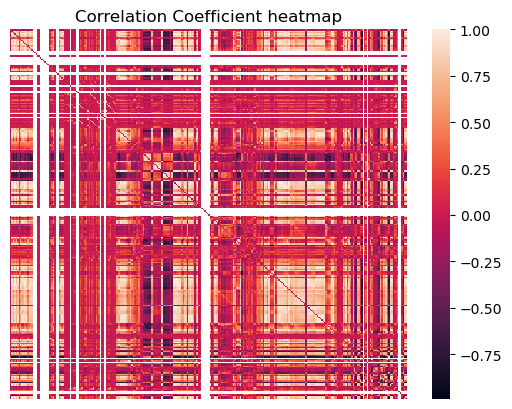

In [27]:
#join LOX and ANT to one matrix. Calculate correlation coefficient and drop columns
#with minimum threshold
corr_matrix = merged_train.corr() #correlation coefficient calculation
np.fill_diagonal(corr_matrix.values, 0) # set diagonal to 0
threshold = 0.9

ax = plt.axes()
sns.heatmap(corr_matrix, xticklabels=False, yticklabels=False)
ax.set_title('Correlation Coefficient heatmap')

corr_matrix = abs(corr_matrix) #absolute values of corr coef

corr_matrix = corr_matrix.replace(np.nan, 0) #replace nan with 0

corr_matrix.values[np.tril_indices(corr_matrix.shape[0], k=0)] = 0 #set values below diagonal to 0 so i dont drop both columns

drop_columns = corr_matrix.columns[corr_matrix.max() > threshold].tolist() #columns where corr coef > threshold
corr_coeff_set = merged_train.drop(drop_columns, axis = 1) #drop above columns
df_test = df_test.drop(drop_columns, axis=1) #drop same columns from tests
print("Shape of train set after column drop",corr_coeff_set.shape)
plt.savefig('../results/heatmap', dpi=500)

In [28]:
#form data for tests
x = merged_train.loc[:, merged_train.columns != 'class']
y = merged_train.iloc[:,0]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)

In [29]:
from sklearn.feature_selection import mutual_info_classif

importances = mutual_info_classif(x,y)

In [30]:
mean_abs_diff = np.sum(np.abs(x - np.mean(x, axis=0)), axis=0)/x.shape[0]
mean_abs_diff = mean_abs_diff.sort_values(ascending=True)

In [66]:
def calc_v_in_k_percent(arr, k, v):
    the_array = arr
    the_array.sort()
    if v <= the_array[int(len(the_array) * k)]:
        return True
    return False
    

SyntaxError: invalid syntax (1638165666.py, line 1)

In [45]:
calc_v_in_k_percent(importances, 0.1, 0.01)

False

In [52]:
1 - corr_coeff_set.shape[1]/merged_train.shape[1]

0.42805755395683454

In [65]:
a = [1,7,9,3,5,6,2]
calc_v_in_k_percent(ref a, 0.2, 2)

SyntaxError: invalid syntax (3961647006.py, line 2)

In [64]:
a

[1, 2, 3, 5, 6, 7, 9]